<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

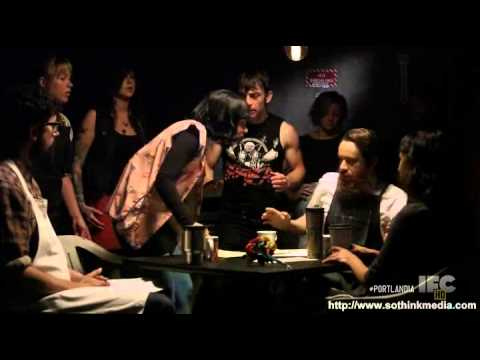

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'D:\\Python projects\\002-natlang\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [7]:
import pandas as pd
from collections import Counter
import spacy
from spacy.tokenizer import Tokenizer

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating
...,...,...,...
7611,The Steeping Room,2/19/2015 I actually step into this restauran...,4.0 star rating
7612,The Steeping Room,"1/21/2016 Ok, The Steeping Room IS awesome. H...",5.0 star rating
7613,The Steeping Room,"4/30/2015 Loved coming here for tea, and the ...",4.0 star rating
7614,The Steeping Room,8/2/2015 The food is just average. The booths...,3.0 star rating


In [8]:
# Start here 

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [9]:


nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [10]:
nlp.Defaults.stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [50]:
# Created these functions in classes so they are more modular

class HandleTokens(object):
    @staticmethod
    def tokenize(df_in):
        tokens = []
        for doc in tokenizer.pipe(df_in, batch_size=500):
            doc_tokens = [token.text for token in doc]
            tokens.append(doc_tokens)
        return tokens
    @staticmethod
    def count(docs):
        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')
    
    @staticmethod
    def stopwords(list_in):
        return nlp.Defaults.stop_words.union(list_in)
    
    @staticmethod
    def combine_stopwords(dataframe_in, stopword_dict):
        tokens = []

        for doc in tokenizer.pipe(dataframe_in, batch_size=500):

            doc_tokens = []

            for token in doc: 
                if token.text.lower() not in stopword_dict:
                    doc_tokens.append(token.text.lower())

            tokens.append(doc_tokens)

        return tokens
    

In [51]:
HT = HandleTokens()
token_list = HT.tokenize(shops["full_review_text"])
token_list

[[' ',
  '11/25/2016',
  '1',
  'check-in',
  'Love',
  'love',
  'loved',
  'the',
  'atmosphere!',
  'Every',
  'corner',
  'of',
  'the',
  'coffee',
  'shop',
  'had',
  'its',
  'own',
  'style,',
  'and',
  'there',
  'were',
  'swings!!!',
  'I',
  'ordered',
  'the',
  'matcha',
  'latte,',
  'and',
  'it',
  'was',
  'muy',
  'fantastico!',
  'Ordering',
  'and',
  'getting',
  'my',
  'drink',
  'were',
  'pretty',
  'streamlined.',
  'I',
  'ordered',
  'on',
  'an',
  'iPad,',
  'which',
  'included',
  'all',
  'beverage',
  'selections',
  'that',
  'ranged',
  'from',
  'coffee',
  'to',
  'wine,',
  'desired',
  'level',
  'of',
  'sweetness,',
  'and',
  'a',
  'checkout',
  'system.',
  'I',
  'got',
  'my',
  'latte',
  'within',
  'minutes!',
  ' ',
  'I',
  'was',
  'hoping',
  'for',
  'a',
  'typical',
  'heart',
  'or',
  'feather',
  'on',
  'my',
  'latte,',
  'but',
  'found',
  'myself',
  'listing',
  'out',
  'all',
  'the',
  'possibilities',
  'of',
  'w

In [52]:
def combine_stopwords(dataframe_in, stopword_dict):
    tokens = []

    for doc in tokenizer.pipe(dataframe_in, batch_size=500):

        doc_tokens = []

        for token in doc: 
            if token.text.lower() not in stopword_dict:
                doc_tokens.append(token.text.lower())

        tokens.append(doc_tokens)

    return tokens

mylist = ['batteries','I', 'amazon', 'i', 'Amazon', 'it', "it's", 'it.', 'the', 'this', "1", "i'm","i've", "got", "-", "come", '&']

STOP_WORDS = HT.stopwords(mylist)

token_list = combine_stopwords(shops["full_review_text"],STOP_WORDS)


shops['tokens'] = combine_stopwords(shops["full_review_text"],STOP_WORDS)
shops

,coffee_shop_name,full_review_text,star_rating,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[ , 11/25/2016, check-in, love, love, loved, a..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[ , 12/2/2016, listed, date, night:, austin,, ..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"[ , 11/30/2016, check-in, listed, brunch, spot..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,"[ , 11/25/2016, cool, decor!, good, drinks, ni..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,"[ , 12/3/2016, check-in, located, northcross, ..."
...,...,...,...,...
7611,The Steeping Room,2/19/2015 I actually step into this restauran...,4.0 star rating,"[ , 2/19/2015, actually, step, restaurant, cha..."
7612,The Steeping Room,"1/21/2016 Ok, The Steeping Room IS awesome. H...",5.0 star rating,"[ , 1/21/2016, ok,, steeping, room, awesome., ..."
7613,The Steeping Room,"4/30/2015 Loved coming here for tea, and the ...",4.0 star rating,"[ , 4/30/2015, loved, coming, tea,, atmosphere..."
7614,The Steeping Room,8/2/2015 The food is just average. The booths...,3.0 star rating,"[ , 8/2/2015, food, average., booths, didn't, ..."


In [63]:
star_list = shops["star_rating"]
state = []
for i, x in enumerate(star_list):
    state.append(x[1])
    
float_state = []
for i, x in enumerate(star_list):
    state.append(x[1])
    
state

['5',
 '4',
 '4',
 '2',
 '4',
 '4',
 '4',
 '5',
 '3',
 '5',
 '4',
 '3',
 '3',
 '5',
 '5',
 '5',
 '5',
 '4',
 '4',
 '4',
 '5',
 '5',
 '4',
 '5',
 '5',
 '1',
 '5',
 '5',
 '5',
 '5',
 '4',
 '5',
 '5',
 '3',
 '5',
 '5',
 '4',
 '5',
 '5',
 '1',
 '2',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '3',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '2',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '3',
 '4',
 '2',
 '4',
 '4',
 '4',
 '4',
 '5',
 '5',
 '5',
 '3',
 '4',
 '4',
 '4',
 '5',
 '3',
 '4',
 '3',
 '4',
 '5',
 '4',
 '4',
 '1',
 '4',
 '5',
 '4',
 '5',
 '1',
 '2',
 '4',
 '3',
 '4',
 '4',
 '2',
 '5',
 '4',
 '4',
 '5',
 '4',
 '4',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '4',
 '5',
 '5',
 '5',
 '4',
 '4',
 '5',
 '4',
 '4',
 '5',
 '4',
 '5',
 '5',
 '5',
 '5',
 '3',
 '4',
 '4',
 '5',
 '5',
 '4',
 '5',
 '5',
 '5',
 '5',
 '5',
 '3',
 '5',
 '3',
 '4',
 '5',
 '5',
 '3',
 '4',
 '4',
 '3',
 '3',
 '4',
 '4',
 '4',
 '5',
 '5',
 '5',
 '4',
 '4',
 '4',
 '4',
 '4',
 '5'

In [64]:
shops["star"] = state
shops["star_float"] = float_state

HT.count(shops['star'])
shops 


ValueError: Length of values (15232) does not match length of index (7616)

In [55]:
shops.sort_values('star_float', ascending=False)

KeyError: 'star_float'

In [56]:
shops["tokens"] = token_list
wc = HT.count(shops['tokens'])
wc

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
6,,7616,22606,1.0,0.054968,0.054968,1.000000
22,coffee,4210,8058,2.0,0.019594,0.074562,0.552784
150,place,3029,4264,3.0,0.010368,0.084930,0.397715
97,great,2438,3250,4.0,0.007903,0.092833,0.320116
194,like,2034,2902,5.0,0.007056,0.099889,0.267069
...,...,...,...,...,...,...,...
40473,actuality.,1,1,40476.0,0.000002,0.999990,0.000131
40474,crass.,1,1,40477.0,0.000002,0.999993,0.000131
40476,restrictions.,1,1,40478.0,0.000002,0.999995,0.000131
40477,"specially,",1,1,40479.0,0.000002,0.999998,0.000131


In [57]:
shops

,coffee_shop_name,full_review_text,star_rating,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[ , 11/25/2016, check-in, love, love, loved, a..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[ , 12/2/2016, listed, date, night:, austin,, ..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"[ , 11/30/2016, check-in, listed, brunch, spot..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,"[ , 11/25/2016, cool, decor!, good, drinks, ni..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,"[ , 12/3/2016, check-in, located, northcross, ..."
...,...,...,...,...
7611,The Steeping Room,2/19/2015 I actually step into this restauran...,4.0 star rating,"[ , 2/19/2015, actually, step, restaurant, cha..."
7612,The Steeping Room,"1/21/2016 Ok, The Steeping Room IS awesome. H...",5.0 star rating,"[ , 1/21/2016, ok,, steeping, room, awesome., ..."
7613,The Steeping Room,"4/30/2015 Loved coming here for tea, and the ...",4.0 star rating,"[ , 4/30/2015, loved, coming, tea,, atmosphere..."
7614,The Steeping Room,8/2/2015 The food is just average. The booths...,3.0 star rating,"[ , 8/2/2015, food, average., booths, didn't, ..."


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


C:\Users\corte\anaconda3\envs\002-natlang\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


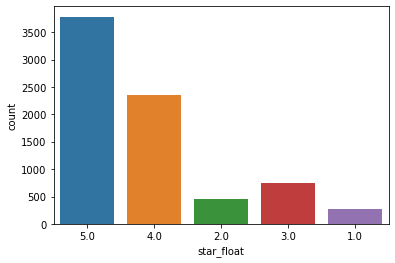

In [37]:
import seaborn as sns

sns.countplot(shops["star_float"]);

In [57]:
Lowest = HT.count(shops[shops["star"] == "1.0"]["tokens"])
Lowest

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
30,the,243,1238,1.0,0.034640,0.034640,0.874101
24,I,213,1157,2.0,0.032374,0.067014,0.766187
68,and,232,1054,3.0,0.029492,0.096505,0.834532
69,to,227,881,4.0,0.024651,0.121156,0.816547
113,,278,880,5.0,0.024623,0.145779,1.000000
...,...,...,...,...,...,...,...
6389,overzealous,1,1,6390.0,0.000028,0.999888,0.003597
6351,waitress,1,1,6391.0,0.000028,0.999916,0.003597
6390,throat,1,1,6392.0,0.000028,0.999944,0.003597
6371,back!,1,1,6393.0,0.000028,0.999972,0.003597


In [58]:
Highest = HT.count(shops[shops["star"] == "5.0"]["tokens"])
Highest

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
44,and,3359,12231,1.0,0.034596,0.034596,0.888624
20,the,3149,11861,2.0,0.033549,0.068145,0.833069
72,,3780,10160,3.0,0.028738,0.096882,1.000000
75,a,2894,9142,4.0,0.025858,0.122741,0.765608
16,I,2534,8184,5.0,0.023149,0.145889,0.670370
...,...,...,...,...,...,...,...
28086,IT?!,1,1,28087.0,0.000003,0.999989,0.000265
28087,(pork),1,1,28088.0,0.000003,0.999992,0.000265
28088,restrictions.,1,1,28089.0,0.000003,0.999994,0.000265
28089,YOU.,1,1,28090.0,0.000003,0.999997,0.000265


In [49]:
wc.head(50)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
6,,7616,22606,1.0,0.053626,0.053626,1.000000
22,coffee,4210,8058,2.0,0.019115,0.072741,0.552784
153,place,3029,4264,3.0,0.010115,0.082856,0.397715
100,great,2438,3250,4.0,0.007710,0.090566,0.320116
197,like,2034,2902,5.0,0.006884,0.097450,0.267069
166,good,2084,2779,6.0,0.006592,0.104042,0.273634
44,1,1998,2035,7.0,0.004827,0.108870,0.262342
33,check-in,1957,1961,8.0,0.004652,0.113522,0.256959
35,love,1434,1806,9.0,0.004284,0.117806,0.188288
311,i'm,1382,1797,10.0,0.004263,0.122069,0.181460


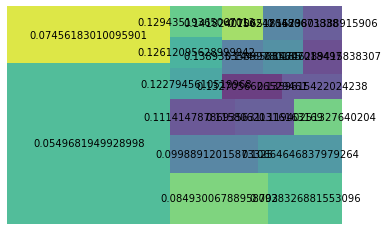

In [65]:
import squarify
import matplotlib.pyplot as plt
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20["pct_total"], label=wc_top20["cul_pct_total"], alpha=.8 )
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

